In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullLocator, MaxNLocator
from matplotlib.colors import Normalize
%matplotlib inline

pd.set_option('display.max_rows', None)

In [4]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'}
page_all_results = requests.get('https://www.parkrun.ru/results/courserecords/', headers=headers)

In [5]:
data = pd.read_html(page_all_results.text)[0]
data.drop(data.columns[[1, 5]], axis=1, inplace=True)
data.columns = ['parkrun', 'w_name', 'w_time', 'w_date', 'm_name', 'm_time', 'm_date']

# Рекорды трассы

In [6]:
data

,parkrun,w_name,w_time,w_date,m_name,m_time,m_date
0,Angarskie Prudy,Яна ЯМЩИКОВА,19:47,05/06/2021,Фёдор БАКУЛОВ,16:53,28/09/2019
1,Babushkinsky na Yauze,Женя Л,19:58,03/04/2021,Виктор НИКОЛАЕВ,15:53,09/10/2021
2,Balashikha Zarechnaya,Наталья СТУДЕНИКИНА,17:53,03/04/2021,Роман САЗОНОВ,15:40,08/09/2018
3,Belgorod Park Pobedy,Елена СКОБЛИНА,18:37,05/06/2021,Михаил ЗВЯГИНЦЕВ,16:26,07/03/2020
4,Bitsa,Анна БАЛАКШИНА,18:52,12/08/2017,Виктор НИКОЛАЕВ,16:04,27/10/2018
5,Boeva Dacha,Анастасия ГРИЗДРЕНКО,19:19,24/07/2021,Иван БУБНОВ,15:58,10/04/2021
6,Butovo,Светлана ДУДАРЬ,18:05,28/08/2021,Виктор НИКОЛАЕВ,15:57,06/07/2019
7,Buzuluk Park Pushkina,Ирина БИРЮЛИНА,20:15,02/10/2021,Рустам ИХСАНОВ,17:01,19/06/2021
8,Cheboksary naberezhnaya,Зинаида ОБРУЧКОВА,18:05,08/05/2021,Андрей КИРИЛЛОВ,16:17,10/07/2021
9,Chelyabinsk,Антонина ОГОРОДНИКОВА,18:18,23/07/2016,Azamat FATTAKHOV,15:58,28/08/2021


Записи с "нетипичными" данными

In [7]:
mask = (data['w_date'].str.len() > 10) | (data['m_date'].str.len() > 10)
data.loc[mask]

,parkrun,w_name,w_time,w_date,m_name,m_time,m_date
23,Kazan Central,Рамиля ШАГИЕВААлсу ШАГИЕВА,20:29,27/08/201627/08/2016,Кирилл ДЯТЛОВ,16:18,16/10/2021
87,Strelka,Людмила ХОДАКОВАКсения ДОНЕЦ,20:29,09/01/202118/09/2021,Leonid EMELYANOV,16:35,28/08/2021


## Список всех российских паркранов

In [8]:
russian_parkruns = data['parkrun']

Всего активных паркранов в России:

In [9]:
len(russian_parkruns)

108

In [10]:
russian_parkruns

0                  Angarskie Prudy
1            Babushkinsky na Yauze
2            Balashikha Zarechnaya
3             Belgorod Park Pobedy
4                            Bitsa
5                      Boeva Dacha
6                           Butovo
7            Buzuluk Park Pushkina
8          Cheboksary naberezhnaya
9                      Chelyabinsk
10             Chelyabinsk Ekopark
11       Chertanovo Pokrovsky Park
12                     Dolgoprudny
13                         Druzhba
14                   Elagin Ostrov
15                     Filatov Lug
16                            Fili
17             Gatchina Prioratsky
18                      Gorky Park
19            Gorodskoy Park Semya
20                  Gubernsky Park
21             Internatsionalistov
22                       Izmailovo
23                   Kazan Central
24                          Khimki
25                           Kimry
26            Kolchugino City Park
27                     Kolomenskoe
28                  

In [11]:
russian_parkruns.to_csv('russian_parkruns.csv', index=False, header=False)

## Анализ мужских результатов

### Топ10 рекордов мужчин и самых быстрых российских паркранов

In [12]:
data.drop(data.iloc[:,1:4], axis=1).sort_values(by=['m_time']).reset_index(drop=True).head(10)

,parkrun,m_name,m_time,m_date
0,Tambov,Леон АРТЁМОВ,14:28,08/06/2019
1,Gorky Park,Вячеслав СОКОЛОВ,14:50,27/04/2019
2,Elagin Ostrov,Валентин СМИРНОВ,14:53,10/08/2019
3,Ufa Botanichesky Sad,Григорий АНДРЕЕВ,14:57,12/05/2018
4,Mega Park Kudrovo,Дмитрий ТРИПУТЕНЬ,15:01,21/07/2018
5,Nizhny Prud,Владимир САФРОНОВ,15:04,10/07/2021
6,Sosnovka,Станислав АГЕЛЬЯРОВ,15:11,01/06/2019
7,Ryazan Central,Александр ИМЕНИН,15:14,27/08/2016
8,Vernadskogo,Вячеслав СОКОЛОВ,15:16,13/04/2019
9,Ryazan Oreshek,Александр ИМЕНИН,15:18,28/12/2019


### Топ5 мужчин с наибольшим количеством рекордов на разных паркранах

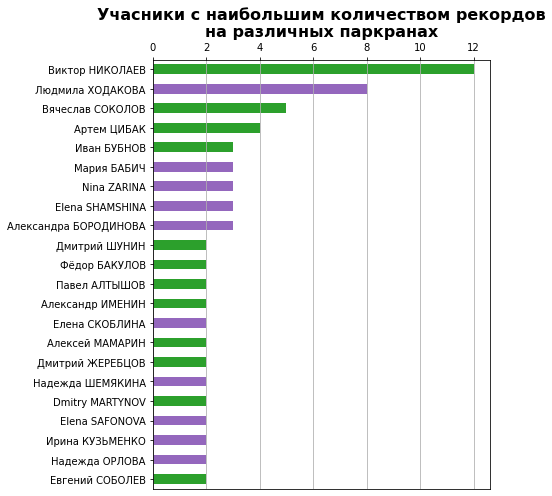

In [13]:
rec_men = data['m_name'].value_counts()
rec_women = data['w_name'].value_counts()
most_rec_men = rec_men[rec_men > 1]
most_rec_women = rec_women[rec_women > 1]
df = pd.concat([most_rec_men, most_rec_women], axis = 0).sort_values(ascending=True)
plt.figure(figsize=(7,7))
ax = df.plot(kind = 'barh', grid=True)
for ptch, tick in zip(ax.patches, ax.yaxis.get_major_ticks()):
    c = '#2ca02c' if tick.label.get_text() in most_rec_men.index else '#9467bd'
    ptch.set_facecolor(c)

ax.grid(b=False, which='major', axis='y')

ax.xaxis.set_major_locator(MaxNLocator(steps=[1, 2], integer=True))
ax.xaxis.tick_top()
plt.title('Учасники с наибольшим количеством рекордов\nна различных паркранах', size=16, fontweight='bold')
plt.tight_layout()

### 10 самых медленных паркранов (где мужские рекорды пока не высокие)

In [14]:
data.drop(data.iloc[:,[1,2,3,4,6]], axis=1)\
.sort_values(by=['m_time'], ascending=False).reset_index(drop=True).head(10)

,parkrun,m_time
0,Vorkuta Gorodskoy Park,20:51
1,Lesopark Severny,18:33
2,Lebediny Ray,18:15
3,Kolchugino City Park,17:46
4,Serpukhov Gorodskoy Bor,17:43
5,Memorialny Park,17:42
6,Strezhevoy Gorodskoy Park,17:39
7,park 30-letiya Oktyabrya,17:36
8,Rasskazovka,17:36
9,Magnitogorsk Ecopark,17:34


## Анализ женских результатов

### Топ10 рекордов женщин и самых быстрых российских паркранов

In [15]:
data.drop(data.iloc[:,4:], axis=1).sort_values(by=[data.columns[2]]).reset_index(drop=True).head(10)

,parkrun,w_name,w_time,w_date
0,Ufa Botanichesky Sad,Юлия АНДРЕЕВА,16:02,17/08/2019
1,Elagin Ostrov,Анжелика ШЕВЧЕНКО,17:14,10/08/2019
2,Zatyumensky,Нигина ТУХТАЕВА,17:20,17/07/2021
3,Readovsky Park,Оксана СТОЛЯРОВА,17:24,22/06/2019
4,Gorky Park,Мария БЫСТРОВА,17:26,21/05/2016
5,Rostov on Don,Александра БОРОДИНОВА,17:32,06/11/2021
6,Meshchersky,Елена ТОЛСТЫХ,17:41,18/09/2021
7,Pokrovskoe-Streshnevo,Наталия ГРИГОРЬЕВА,17:42,01/06/2019
8,Ryazan Oreshek,Мария ИМЕНИНА,17:42,08/09/2018
9,Druzhba,Nina ZARINA,17:45,08/06/2019


### Топ5 женщин с наибольшим количеством рекордов на разных паркранах

In [16]:
data[data.columns[1]].value_counts()[:5]

Людмила ХОДАКОВА         8
Александра БОРОДИНОВА    3
Elena SHAMSHINA          3
Nina ZARINA              3
Мария БАБИЧ              3
Name: w_name, dtype: int64

### 10 самых медленных паркранов (где женские рекорды пока не высокие)

In [17]:
data.drop(data.iloc[:,3:], axis=1).drop(data.columns[1], axis=1)\
.sort_values(by=[data.columns[2]], ascending=False).reset_index(drop=True).head(10)

,parkrun,w_time
0,Muromets,26:40
1,Vorkuta Gorodskoy Park,26:25
2,Lebediny Ray,23:56
3,Starye Sady,21:54
4,Pavlovsky Posad,21:39
5,Petrovskaya naberezhnaya,21:38
6,Yarmarochnaya Ploshchad,21:33
7,Strezhevoy Gorodskoy Park,21:32
8,Komsomolsky,21:20
9,Pur-Navolok,21:16


## Разное

Проверка данных на консистентность

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   parkrun  108 non-null    object
 1   w_name   108 non-null    object
 2   w_time   108 non-null    object
 3   w_date   108 non-null    object
 4   m_name   108 non-null    object
 5   m_time   108 non-null    object
 6   m_date   108 non-null    object
dtypes: object(7)
memory usage: 6.0+ KB


In [19]:
data.shape

(108, 7)

In [20]:
data.columns

Index(['parkrun', 'w_name', 'w_time', 'w_date', 'm_name', 'm_time', 'm_date'], dtype='object')

In [19]:
data[data.columns[5]] = ('00:' + data[data.columns[5]]).apply(pd.to_timedelta)

In [27]:
data.head(20)

,parkrun,w_name,w_time,w_date,m_name,m_time,m_date
0,Angarskie Prudy,Марина ЖАЛЫБИНА,20:24,27/07/2019,Фёдор БАКУЛОВ,16:53,28/09/2019
1,Babushkinsky na Yauze,Женя Л,19:58,03/04/2021,Александр ХАНКОВ,16:41,10/04/2021
2,Balashikha Zarechnaya,Наталья СТУДЕНИКИНА,17:53,03/04/2021,Роман САЗОНОВ,15:40,08/09/2018
3,Belgorod Park Pobedy,Ксения АВДЕЕВА,19:56,10/08/2019,Михаил ЗВЯГИНЦЕВ,16:26,07/03/2020
4,Bitsa,Анна БАЛАКШИНА,18:52,12/08/2017,Виктор НИКОЛАЕВ,16:04,27/10/2018
5,Boeva Dacha,Анна КАРАСЮК,19:36,19/12/2020,Иван БУБНОВ,15:58,10/04/2021
6,Butovo,Дарья ЧУДАЙКИНА,18:39,22/08/2015,Виктор НИКОЛАЕВ,15:57,06/07/2019
7,Cheboksary naberezhnaya,Зинаида ОБРУЧКОВА,18:05,Новый рекорд на этой неделе,Михаил УМНОВ,16:51,17/04/2021
8,Chelyabinsk,Антонина ОГОРОДНИКОВА,18:18,23/07/2016,Алексей РЫЖОВ,16:17,24/09/2016
9,Chelyabinsk Ekopark,Анастасия СОКОЛОВА,20:48,17/04/2021,Никита СПИРИДОНОВ,16:42,01/05/2021


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   (Parkrun, Паркран)   92 non-null     object         
 1   (Женщины, Участник)  92 non-null     object         
 2   (Женщины, Время)     92 non-null     object         
 3   (Женщины, Дата)      92 non-null     object         
 4   (Мужчины, Участник)  92 non-null     object         
 5   (Мужчины, Время)     92 non-null     timedelta64[ns]
 6   (Мужчины, Дата)      92 non-null     object         
dtypes: object(6), timedelta64[ns](1)
memory usage: 5.2+ KB


In [22]:
pd.to_timedelta('00:' + data[data.columns[2]])

0    0 days 00:20:24
1    0 days 00:19:58
2    0 days 00:17:53
3    0 days 00:19:56
4    0 days 00:18:52
5    0 days 00:19:36
6    0 days 00:18:39
7    0 days 00:19:14
8    0 days 00:18:18
9    0 days 00:20:48
10   0 days 00:20:14
11   0 days 00:19:22
12   0 days 00:17:45
13   0 days 00:17:14
14   0 days 00:20:42
15   0 days 00:20:45
16   0 days 00:20:45
17   0 days 00:17:26
18   0 days 00:20:40
19   0 days 00:22:03
20   0 days 00:18:27
21   0 days 00:20:29
22   0 days 00:19:57
23   0 days 00:19:34
24   0 days 00:19:18
25   0 days 00:17:57
26   0 days 00:20:10
27   0 days 00:22:09
28   0 days 00:19:11
29   0 days 00:18:47
30   0 days 00:19:05
31   0 days 00:22:17
32   0 days 00:18:16
33   0 days 00:22:08
34   0 days 00:23:43
35   0 days 00:23:52
36   0 days 00:19:07
37   0 days 00:18:12
38   0 days 00:19:14
39   0 days 00:18:22
40   0 days 00:21:01
41   0 days 00:18:01
42   0 days 00:19:42
43   0 days 00:22:28
44   0 days 00:21:26
45   0 days 00:19:57
46   0 days 00:19:06
47   0 days 0

In [23]:
data[data.columns[6]] = data[data.columns[6]].astype('str')
#df['B'] = df['B'].astype('str')